In [1]:
from collections import Counter
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Separate 7 models and human data. 
# Assume Human text is from model 100,000 and machine text is from model 7 in domain 1
file_path_1 = 'data/domain1_train.json'
df1 = pd.read_json(file_path_1, lines=True)
df1.loc[df1['label'] == 1, 'model'] = 100000
df1.loc[df1['label'] == 0, 'model'] = 7

file_path_2 = 'data/domain2_train.json'
df2 = pd.read_json(file_path_2, lines=True)
df2['model'].fillna(100000, inplace=True)

df_comb = pd.concat([df1, df2],axis=0,ignore_index=True)

display(df_comb.groupby(df_comb['model']).count())

file_path_3 = 'data/test_set.json'
df_Kaggle = pd.read_json(file_path_3, lines=True)

,text,label
model,,
0.0,2364,2364
1.0,2357,2357
2.0,2339,2339
3.0,2358,2358
4.0,789,789
5.0,780,780
6.0,1763,1763
7.0,9750,9750
100000.0,11900,11900


In [3]:
# Separate observations per model
m0 = df_comb.loc[df_comb['model']==0]
m1 = df_comb.loc[df_comb['model']==1]
m2 = df_comb.loc[df_comb['model']==2]
m3 = df_comb.loc[df_comb['model']==3]
m4 = df_comb.loc[df_comb['model']==4]
m5 = df_comb.loc[df_comb['model']==5]
m6 = df_comb.loc[df_comb['model']==6]
m7 = df_comb.loc[df_comb['model']==7]
mh = df_comb.loc[df_comb['model']==100000]

In [4]:
# Get text generated per model
t0 = m0['text']
t1 = m1['text']
t2 = m2['text']
t3 = m3['text']
t4 = m4['text']
t5 = m5['text']
t6 = m6['text']
t7 = m7['text']
th = mh['text']
tKaggle = df_Kaggle['text']

In [5]:
# flatten the text to list in order to count
flattened_t0 = [element for sublist in t0 for element in sublist]
flattened_t1 = [element for sublist in t1 for element in sublist]
flattened_t2 = [element for sublist in t2 for element in sublist]
flattened_t3 = [element for sublist in t3 for element in sublist]
flattened_t4 = [element for sublist in t4 for element in sublist]
flattened_t5 = [element for sublist in t5 for element in sublist]
flattened_t6 = [element for sublist in t6 for element in sublist]
flattened_t7 = [element for sublist in t7 for element in sublist]
flattened_th = [element for sublist in th for element in sublist]
flattened_tKaggle = [element for sublist in tKaggle for element in sublist]

In [6]:
# Count the frequencies of each element in the list
word_frequencies_t0 = Counter(flattened_t0)
word_frequencies_t1 = Counter(flattened_t1)
word_frequencies_t2 = Counter(flattened_t2)
word_frequencies_t3 = Counter(flattened_t3)
word_frequencies_t4 = Counter(flattened_t4)
word_frequencies_t5 = Counter(flattened_t5)
word_frequencies_t6 = Counter(flattened_t6)
word_frequencies_t7 = Counter(flattened_t7)
word_frequencies_th = Counter(flattened_th)
word_frequencies_tKaggle = Counter(flattened_tKaggle) 

# for element, frequency in element_frequencies.items():
#     print(f"Element {element} appears {frequency} times.")
word_frequencies_tKaggle[1]

6721

In [7]:
# Sort the dictionary according to the key (words) and then compute the relative frequncy
total_frequency_t0 = sum(word_frequencies_t0.values())
total_frequency_t1 = sum(word_frequencies_t1.values())
total_frequency_t2 = sum(word_frequencies_t2.values())
total_frequency_t3 = sum(word_frequencies_t3.values())
total_frequency_t4 = sum(word_frequencies_t4.values())
total_frequency_t5 = sum(word_frequencies_t5.values())
total_frequency_t6 = sum(word_frequencies_t6.values())
total_frequency_t7 = sum(word_frequencies_t7.values())
total_frequency_th = sum(word_frequencies_th.values())
total_frequency_tKaggle = sum(word_frequencies_tKaggle.values())

word_frequencies_t0 = {k: word_frequencies_t0[k] / total_frequency_t0 for k in sorted(word_frequencies_t0)}
word_frequencies_t1 = {k: word_frequencies_t1[k] / total_frequency_t1 for k in sorted(word_frequencies_t1)}
word_frequencies_t2 = {k: word_frequencies_t2[k] / total_frequency_t2 for k in sorted(word_frequencies_t2)}
word_frequencies_t3 = {k: word_frequencies_t3[k] / total_frequency_t3 for k in sorted(word_frequencies_t3)}
word_frequencies_t4 = {k: word_frequencies_t4[k] / total_frequency_t4 for k in sorted(word_frequencies_t4)}
word_frequencies_t5 = {k: word_frequencies_t5[k] / total_frequency_t5 for k in sorted(word_frequencies_t5)}
word_frequencies_t6 = {k: word_frequencies_t6[k] / total_frequency_t6 for k in sorted(word_frequencies_t6)}
word_frequencies_t7 = {k: word_frequencies_t7[k] / total_frequency_t7 for k in sorted(word_frequencies_t7)}
word_frequencies_th = {k: word_frequencies_th[k] / total_frequency_th for k in sorted(word_frequencies_th)}
word_frequencies_tKaggle = {k: word_frequencies_tKaggle[k] / total_frequency_tKaggle for k in sorted(word_frequencies_tKaggle)}

In [8]:
# Extract keys (categories) and values (counts) from the dictionary
words_0 = list(word_frequencies_t0.keys())
words_1 = list(word_frequencies_t1.keys())
words_2 = list(word_frequencies_t2.keys())
words_3 = list(word_frequencies_t3.keys())
words_4 = list(word_frequencies_t4.keys())
words_5 = list(word_frequencies_t5.keys())
words_6 = list(word_frequencies_t6.keys())
words_7 = list(word_frequencies_t7.keys())
words_h = list(word_frequencies_th.keys())
words_Kaggle = list(word_frequencies_tKaggle.keys())

counts_0 = list(word_frequencies_t0.values())
counts_1 = list(word_frequencies_t1.values())
counts_2 = list(word_frequencies_t2.values())
counts_3 = list(word_frequencies_t3.values())
counts_4 = list(word_frequencies_t4.values())
counts_5 = list(word_frequencies_t5.values())
counts_6 = list(word_frequencies_t6.values())
counts_7 = list(word_frequencies_t7.values())
counts_h = list(word_frequencies_th.values())
counts_Kaggle = list(word_frequencies_tKaggle.values())

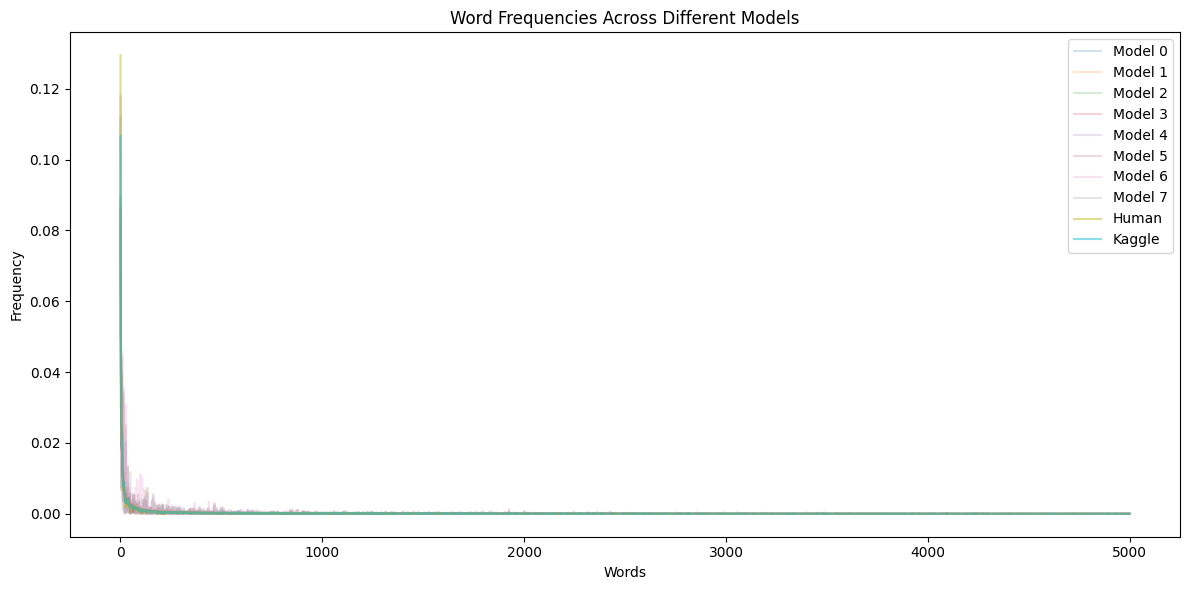

In [9]:
# Plot the relative frequencies of all model using all the words

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Create lines for each model with transparency
for i in range(8):
    # Ensure that all counts_i lists have the same length as words_0
    words_i = locals()[f"words_{i}"]
    counts_i = locals()[f'counts_{i}']
    ax.plot(words_i, counts_i, label=f'Model {i}', alpha=0.2)

ax.plot(words_h, counts_h, label='Human', alpha=0.5)
ax.plot(words_Kaggle, counts_Kaggle, label='Kaggle', alpha=0.5)


# Add labels and title
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Word Frequencies Across Different Models')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


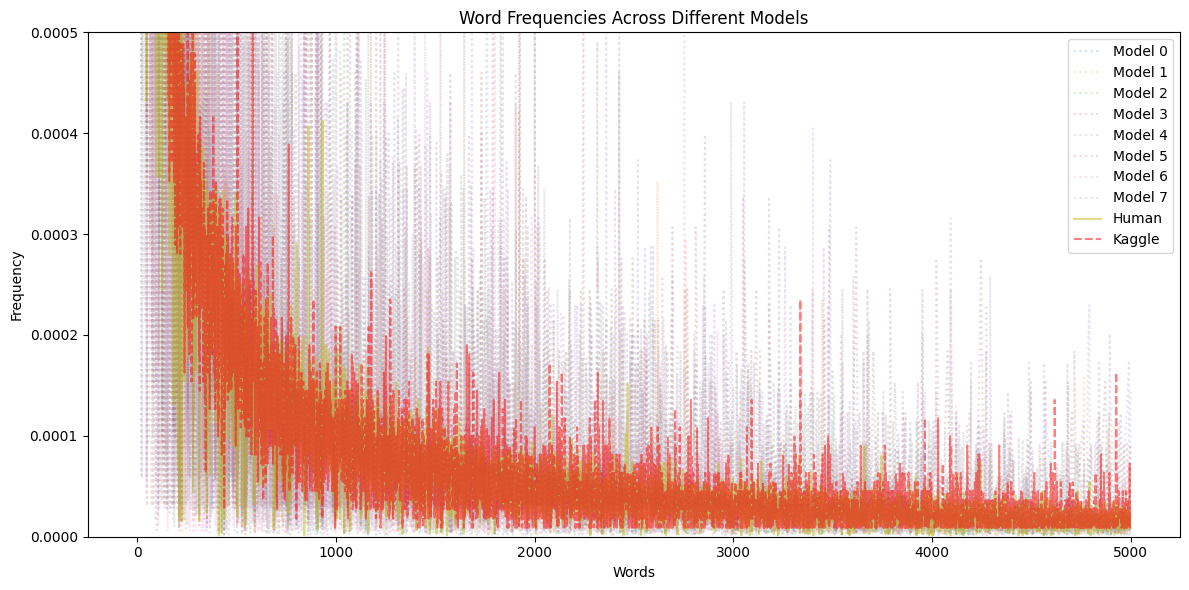

In [10]:
# Plot the relative frequencies of all model using all the words

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Create lines for each model with transparency
for i in range(8):
    # Ensure that all counts_i lists have the same length as words_0
    words_i = locals()[f"words_{i}"]
    counts_i = locals()[f'counts_{i}']
    ax.plot(words_i, counts_i, label=f'Model {i}', alpha=0.2, linestyle = ':')

ax.plot(words_h, counts_h, label='Human', alpha=0.5)
ax.plot(words_Kaggle, counts_Kaggle, label='Kaggle', alpha=0.5, linestyle = '--', color = 'red')


# Add labels and title
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Word Frequencies Across Different Models')

# set the y axis upper limit
ax.set_ylim(top=0.0005, bottom=0)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


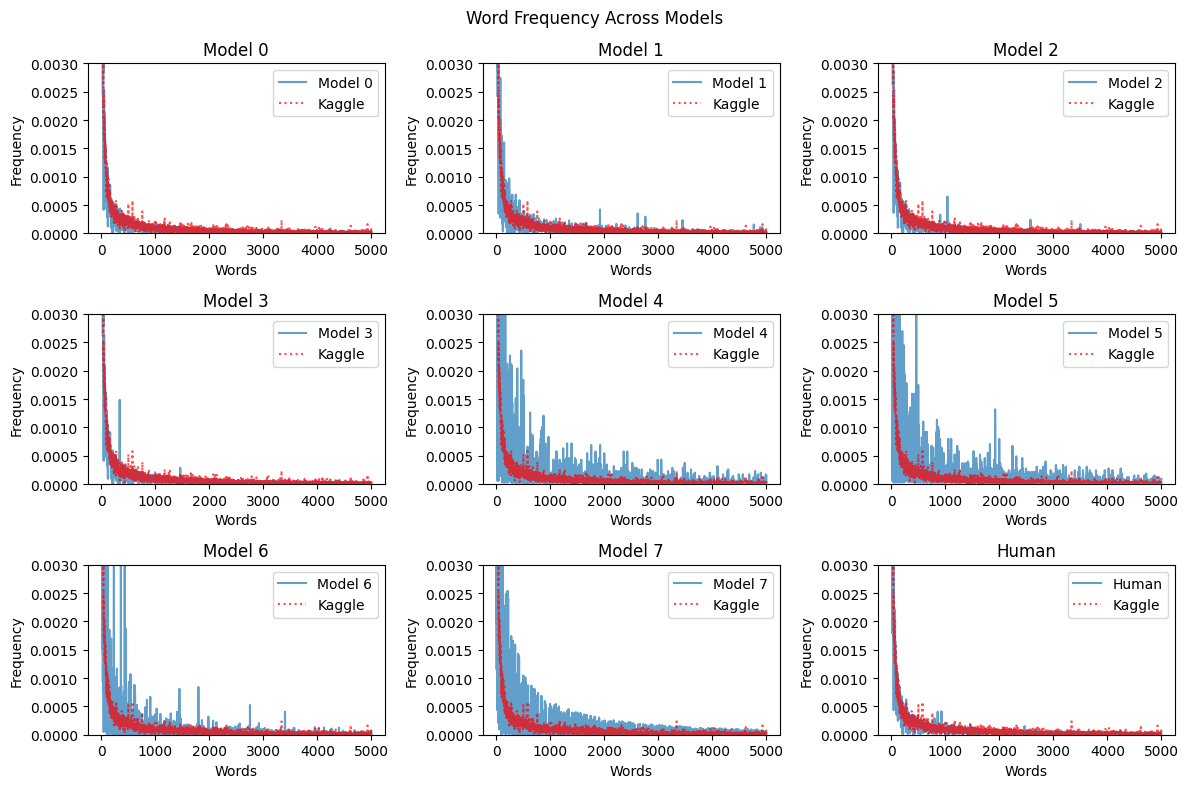

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
num_models = 8

# Create subplots (3x3 grid)
fig, axs = plt.subplots(3, 3, figsize=(12, 8))

# Create lines for each model with transparency
for i in range(num_models):
    words_i = locals()[f"words_{i}"]
    counts_i = locals()[f'counts_{i}']
    row, col = divmod(i, 3)  # Calculate subplot row and column indices
    ax = axs[row, col]  # Access individual subplot
    ax.plot(words_i, counts_i, label=f'Model {i}', alpha=0.7)
    ax.plot(words_Kaggle, counts_Kaggle, label='Kaggle', alpha=0.7, linestyle=':', color='red')
    ax.set_xlabel('Words')  # Customize x-axis label for this subplot
    ax.set_ylabel('Frequency')  # Customize y-axis label for this subplot
    ax.set_title(f'Model {i}')  # Customize subplot title
    ax.set_ylim(top=0.003, bottom=0)  # Set y-axis limits for this subplot

# Plot the human data in the bottom-left subplot
axs[2, 2].plot(words_h, counts_h, label='Human', alpha=0.7)
axs[2, 2].plot(words_Kaggle, counts_Kaggle, label='Kaggle', alpha=0.7, linestyle=':', color='red')
axs[2, 2].set_xlabel('Words')  # Customize x-axis label for this subplot
axs[2, 2].set_ylabel('Frequency')  # Customize y-axis label for this subplot
axs[2, 2].set_title('Human')  # Customize subplot title
axs[2, 2].set_ylim(top=0.003, bottom=0)  # Set y-axis limits for this subplot

# Add an overall title to the figure
fig.suptitle('Word Frequency Across Models')

# Add legends to all subplots
for ax in axs.flat:
    ax.legend()

# Adjust subplot layout
plt.tight_layout()

plt.savefig('Word_Freq.png', facecolor = 'white', dpi = 200)

# Show the plot
plt.show()


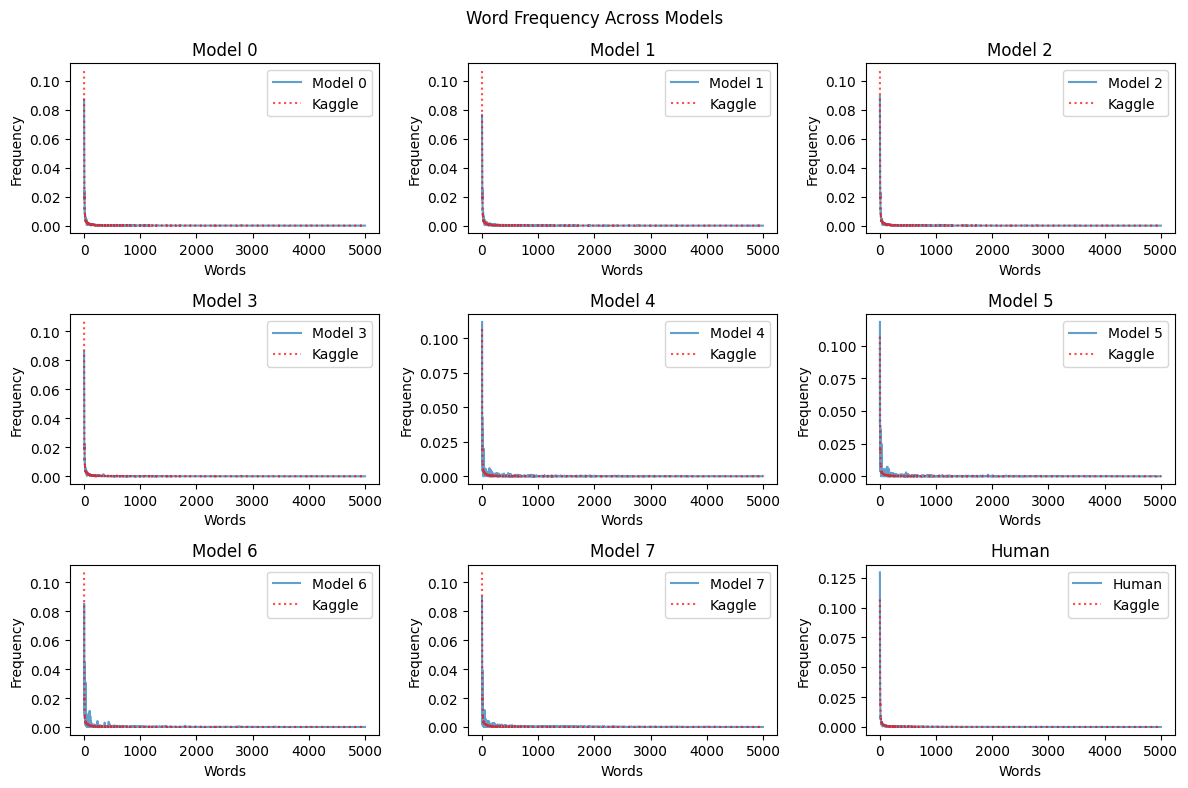

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
num_models = 8

# Create subplots (3x3 grid)
fig, axs = plt.subplots(3, 3, figsize=(12, 8))

# Create lines for each model with transparency
for i in range(num_models):
    words_i = locals()[f"words_{i}"]
    counts_i = locals()[f'counts_{i}']
    row, col = divmod(i, 3)  # Calculate subplot row and column indices
    ax = axs[row, col]  # Access individual subplot
    ax.plot(words_i, counts_i, label=f'Model {i}', alpha=0.7)
    ax.plot(words_Kaggle, counts_Kaggle, label='Kaggle', alpha=0.7, linestyle=':', color='red')
    ax.set_xlabel('Words')  # Customize x-axis label for this subplot
    ax.set_ylabel('Frequency')  # Customize y-axis label for this subplot
    ax.set_title(f'Model {i}')  # Customize subplot title
 # Set y-axis limits for this subplot

# Plot the human data in the bottom-left subplot
axs[2, 2].plot(words_h, counts_h, label='Human', alpha=0.7)
axs[2, 2].plot(words_Kaggle, counts_Kaggle, label='Kaggle', alpha=0.7, linestyle=':', color='red')
axs[2, 2].set_xlabel('Words')  # Customize x-axis label for this subplot
axs[2, 2].set_ylabel('Frequency')  # Customize y-axis label for this subplot
axs[2, 2].set_title('Human')  # Customize subplot title


# Add an overall title to the figure
fig.suptitle('Word Frequency Across Models')

# Add legends to all subplots
for ax in axs.flat:
    ax.legend()

# Adjust subplot layout
plt.tight_layout()

plt.savefig('Word_Freq_full.png', facecolor = 'white', dpi = 200)

# Show the plot
plt.show()
